### Deadline 05.03.2020

# Часть 1 - строки
## 1. Передача данных (0.5)

Для передачи разного рода информации внутри текстовых данных (в частности, с помощью электронной почты), а именно: текст на языках, для которых используются кодировки, отличные от ASCII, и нетекстовые данные, такие, как картинки, музыка, фильмы и программы существуют разные алгоритмы кодирования информации. Вам необходимо реализовать кодирование текстовых последовательностей следующим образом.
#### Кодирование (0.2)
Возьмем текст русский текст «АБВГД». В двоичной форме в кодировке Windows-1251 мы получим 5 байтов:

11000000, 11000001, 11000010, 11000011, 11000100, (00000000) — лишний нулевой байт нужен, чтобы общее число бит делилось на 6.

Разделим эти биты на группы по 6:

110000, 001100, 000111, 000010, 110000, 111100, 010000, 000000.

Берем массив символов

«ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/»

и получившиеся числа переводим в эти символы, используя их, как  индексы массива, получаем «wMHCw8Q». Остается только добавить в конце один символ "=", как указание на один лишний нулевой байт, который мы добавляли на первом шаге и получить окончательный результат:

«АБВГД»: base64 = «wMHCw8Q=».

В общем случае для того, чтобы преобразовать данные, первый байт
помещается в самые старшие восемь бит 24-битного буфера, следующий — в
средние восемь и третий — в младшие значащие восемь бит. Если
кодируется менее чем три байта, то соответствующие биты буфера
устанавливаются в ноль. Далее каждые шесть бит буфера, начиная с самых
старших, используются как индексы строки

«ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/»

и её символы, на которые указывают индексы, помещаются в
выходную строку. Если кодируются только один или два байта, в результате
получаются только первые два или три символа строки, а выходная строка
дополняется двумя или одним символами «=». Это предотвращает
добавление дополнительных битов к восстановленным данным. Процесс
повторяется над оставшимися входными данными.
#### Декодирование (0.2)
С декодированием практически также легко. По сути это обратная операция
кодированию. Последовательность символов, полученных при конвертации
байт, мы разбиваем на ровные группы по 4. Затем каждый символ в
соответствии с алфавитом кодирования мы получаем цифровой порядковый
индекс (номер), каждое подобное значения мы конвертируем в двоичную
систему (6 бит) и получаем 24 бита, которые делим на уже три части и это
будут наши первоначальные байты информации. Повторить до конечного результата.
#### Протестируйте результат (0.1)
Протестируйте реализацию на 5-10 строках из ваших любимых текстов. Сравните результат с библиотекой base64.

In [52]:
import re

TRANSLATING_ARR = f"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijkl" \
                  "mnopqrstuvwxyz0123456789+/"

 
class Converter1251(object):

    @staticmethod
    def encode(text):
        bits = ""
        for symb in text:
            bits += (bin(int.from_bytes(symb.encode('windows-1251'),
                                        'big'))[2:]).zfill(8)
        additional_bytes_num = 0
        res = ""

        while (len(bits) + additional_bytes_num * 8) % 6 != 0:
            additional_bytes_num += 1

        bits += "0" * 8 * additional_bytes_num
        bits_list = [bits[i:i + 6] for i in range(0, len(bits), 6)]
        for letter in bits_list:
            res += "=" if re.match('^0+$', letter) \
                else TRANSLATING_ARR[int(letter, base=2)]

        return res


    @staticmethod
    def decode(coded_text):
        bytes_repr = []

        for i in range(0, len(coded_text), 4):
            
            bits_blocks = "".join([
                format(Converter1251.__reverse_convert(letter), '06b')
                for letter in coded_text[i: i + 4]
            ])

            bytes_repr.extend(
                Converter1251.__convert_buffer_to_letter(bits_blocks.zfill(6)))

        bytes_repr = list(filter(lambda x: x > 0, bytes_repr))
        return bytes(bytes_repr).decode('windows-1251')

    @staticmethod
    def __convert_buffer_to_letter(bits_blocks):
        """принимает 24х битный буффер, возращает 3 символа"""
        letters = []
        for j in range(0, len(bits_blocks), 8):
            letters.append(int(bits_blocks[j: j + 8], base=2))
        return letters

    @staticmethod
    def __reverse_convert(letter):
        return 0 if letter == '=' else TRANSLATING_ARR.index(letter)

## Немного тестов

In [53]:
import numpy as np

def test(test_str):
    return Converter1251.decode(Converter1251.encode(test_str)) == test_str

tests_texts = {
    'small_ex1': 'qasdf',
    'small_ex2': 'тесapsdkfт',
    'small_ex3': '-91unkafhip3anp',
    'norm_ex_1': 'Любовь Андреевна прожила за границей пять лет, не знаю, какая она теперь стала... Хороший она человек. Легкий, простой человек. Помню, когда я был мальчонком лет пятнадцати, отец мой покойный — он тогда здесь на деревне в лавке торговал — ударил меня по лицу кулаком, кровь пошла из носу... Мы тогда вместе пришли зачем-то во двор, и он выпивши был. Любовь Андреевна, ',
    'na': "Дебютная постановка на моссоветовской сцене ведущего актера труппы Александра Яцко, имеющего за плечами режиссерский опыт. Спектакль дает «свежий» взгляд на знакомое со школьной скамьи произведение, оставаясь при этом верным духу великой комедии. Александр Яцко убежден, что «Горе от ума» – лучшая пьеса из когда-либо написанных на русском языке. Хрестоматийных героев он сделал живыми современными людьми, чьи мысли и поступки близки и понятны сидящим в зале. Камерная атмосфера сцены «Под крышей» позволяет подробно и по-новому всмотреться в лица грибоедовских персонажей, понять логику и мотивы их поведения, а стильная лапидарная сценография, автором которой выступил сам постановщик спектакля, придает действию комедии изысканную красоту. Александр Яцко не сделал ни одн"
}

for text in tests_texts:
    print(test(tests_texts[text]))

True
True
True
True
True


### base64
Сравним с соответсвующими методами библиотеки `base64` :
base64.b64encode

In [54]:
import base64

# ToDO: какая-то бага на русских текстах

for text in tests_texts:
    s1,s2 = base64.b64encode(tests_texts[text].encode('windows-1251')), Converter1251.encode(tests_texts[text])
    print('base64: ', base64.b64encode(tests_texts[text].encode('windows-1251')))
    print('Converter1251: ', Converter1251.encode(tests_texts[text]))
    print()

base64:  b'cWFzZGY='
Converter1251:  cWFzZGY=

base64:  b'8uXxYXBzZGtm8g=='
Converter1251:  8uXxYXBzZGtm8g==

base64:  b'LTkxdW5rYWZoaXAzYW5w'
Converter1251:  LTkxdW5rYWZoaX=zYW5w

base64:  b'y/7h7uL8IMDt5PDl5eLt4CDv8O7m6OvgIOfgIOPw4O3o9uXpIO//8vwg6+XyLCDt5SDn7eD+LCDq4Org/yDu7eAg8uXv5fD8IPHy4OvgLi4uINXu8O746Okg7u3gIPfl6+7i5eouIMvl4+ro6Swg7/Du8fLu6SD35evu4uXqLiDP7uzt/iwg6u7j5OAg/yDh++sg7ODr/Pfu7eru7CDr5fIg7//y7eDk9uDy6Cwg7vLl9iDs7ukg7+7q7unt++kglyDu7SDy7uPk4CDn5OXx/CDt4CDk5fDl4u3lIOIg6+Di6uUg8u7w4+7i4OsglyDz5ODw6Osg7OXt/yDv7iDr6PbzIOrz6+Dq7uwsIOrw7uL8IO/u+OvgIOjnIO3u8fMuLi4gzPsg8u7j5OAg4uzl8fLlIO/w6Pjr6CDn4Pfl7C3y7iDi7iDk4u7wLCDoIO7tIOL77+ji+Ogg4fvrLiDL/uHu4vwgwO3k8OXl4u3gLCA='
Converter1251:  y/7h7uL8IMDt5PDl5eLt4CDv8O7m6OvgIOfgIOPw4O3o9uXpIO//8vwg6+XyLCDt5SDn7eD+LCDq4Org/yDu7e=g8uXv5fD8IPHy4OvgLi4uINXu8O746Okg7u3gIPfl6+7i5eouIMvl4+ro6Swg7/Du8fLu6SD35evu4uXqLiDP7uzt/iwg6u7j5O=g/yDh++sg7ODr/Pfu7eru7CDr5fIg7//y7eDk9uDy6Cwg7vLl9iDs7ukg7+7q7unt++kglyDu7SDy7uPk4CDn5OXx/CDt4CDk5fDl4u3lIOIg6+

# Часть 2 - ООП 1

## 2. CounterGetter (0.1 балл)
Реализуйте класс CounterGetter, который на вход принимает произвольное количество именованых аргументов и считает количество обращений к полям и методам класса во всех экземплярах.

## Решение

Чтобы посчитать колиечство обращений к полям и методом переопределим методы отвечающие за контроль доступа к атрибутам:

- `__getattr__(self, name)`
- `__setattr__(self, name)`
- `__delattr__`
- `__getattribute__`
- `__call__`

А так же метод `__repr__` для того, чтобы с помощью print(counter_getter_object) возращать соответствующий счетчик

Дискрипторы: 
- https://habr.com/ru/post/122082/

причем в нашем случае достаточно определить лишь `__getattribute__` и `__setattr__`

In [55]:
import collections

class CounterGetter(object):
    counter = collections.defaultdict(int)

    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        for attr in kwargs:
            if attr not in CounterGetter.counter:
                 CounterGetter.counter[attr] += 1
        
        
    def __getattribute__(self, attr):
        CounterGetter.counter[attr] += 1
        return super(CounterGetter, self).__getattribute__(attr)
    
    def __setattr__(self, name, value):
        CounterGetter.counter[name] += 1
        self.__dict__[name] = value
        return super(CounterGetter, self).__setattr__(name, value)

    def __getitem__(self, attr):
        return CounterGetter.counter[attr]
    
    def __delattr__(self, attr):
        del counter[attr]
        return super(CounterGetter, self).__delattr__(name, value)
    
    def __repr__(self):
        return str(dict(self.counter))

## Немного тестов

In [56]:
test_1 = CounterGetter(
    arg0=2,
    arg1=15,
    arg2="test",
    arg3= True,
    arg4= [1,2,3]
)
print(test_1)
test_1.arg0 = 3

print(test_1)

test_2 = CounterGetter(arg0 = "test")
test_3 = CounterGetter(arg0 = "test")

test_4 = CounterGetter(
    arg0 = test_1, 
    arg1 = test_2, 
    arg2 = test_3
)

test_5 = CounterGetter(arg0 = 'new')

print(test_1, test_2,test_3)

print(test_4)
print(test_5)

{'__dict__': 1, 'arg0': 1, 'arg1': 1, 'arg2': 1, 'arg3': 1, 'arg4': 1, 'counter': 1}
{'__dict__': 2, 'arg0': 2, 'arg1': 1, 'arg2': 1, 'arg3': 1, 'arg4': 1, 'counter': 2}
{'__dict__': 6, 'arg0': 2, 'arg1': 1, 'arg2': 1, 'arg3': 1, 'arg4': 1, 'counter': 3} {'__dict__': 6, 'arg0': 2, 'arg1': 1, 'arg2': 1, 'arg3': 1, 'arg4': 1, 'counter': 4} {'__dict__': 6, 'arg0': 2, 'arg1': 1, 'arg2': 1, 'arg3': 1, 'arg4': 1, 'counter': 5}
{'__dict__': 6, 'arg0': 2, 'arg1': 1, 'arg2': 1, 'arg3': 1, 'arg4': 1, 'counter': 6}
{'__dict__': 6, 'arg0': 2, 'arg1': 1, 'arg2': 1, 'arg3': 1, 'arg4': 1, 'counter': 7}


## 3. Vector (0.4 балла)
Реализуйте класс вектор, который должен обладать следующими свойствами:

Над экземплярами выполняются арифметические операции (+-*/). Операции могут выполняться как с числами, так и с векторами. Если второй операнд вектор, то верните их скалярное произведение, если число, выполните поэлементное действие.
Реализуйте доступ к элементам вектора по индексам:

vec = Vector(1, 2, 3)

vec[0]

Реализуйте умножение вектора на матрицу (Матрица задается двумерным списком).
Поддерживайте методы push_back, pop_back, insert.
Реализуйте поддержку функции len

Будем наследоваться от `list` чтобы не писать `append`, `resize` и прочее самим. Реализуем арифметические операции 
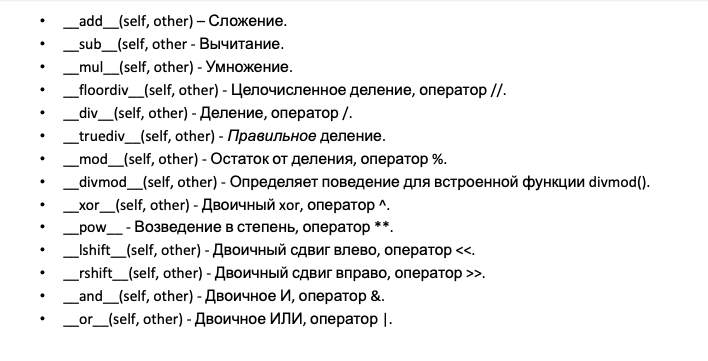

In [57]:
import math


class Vector(list):
    
    def __init__(self, *args):
        super(Vector, self).__init__(*args)
        
    def __iadd__(self, other):
        self = self + other 
        return self
        
    def __add__(self, other):
        if isinstance(other, (int, float, complex)):
            return Vector([self[i] + other for i in range(len(self))])
        elif len(self) != len(other):
            raise Exceptin("Size's does not match")
        try: 
            other = Vector(other)
        except ValueError:
            print("Can't cast to vector")
        return Vector([x + y for x, y in zip(self, other)])
    
    def __sub__(self, other):
        return self + -other
    
    def __isub__(self, other):
        self.__iadd__(-other)
        return self
    
    def __mul__(self, other):
        if isinstance(other, (int, float, complex)):
            return Vector([self[i] * other for i in range(len(self))])
        elif len(self) != len(other):
            raise Exceptin("Size's does not match")
        
        try: 
            other = Vector(other)
        except ValueError:
            print("Can't cast to vector")
                
        return sum([x * y for x, y in zip(self, other)])
    
    def __imul__(self, other):
        self = self * other
        return self
    
    def __truediv__(self, other):
        '''правильное деление'''
        if isinstance(other, (int, float, complex)):
            return Vector([self[i] / other for i in range(len(self))])
        elif len(self) != len(other):
            raise Exceptin("Size's does not match")
        
        try: 
            other = Vector(other)
        except ValueError:
            print("Can't cast to vector")
                
        return Vector([x / y for x, y in zip(self, other)])
    
    def __itruediv__(self, other):
        self = self * other
        return self
    
    def __neg__(self):
        return self * (-1)
    
    def push_back(self, item):
        self.append(item)

    def pop_back(self):
        self.pop()
        
    def len(self):
        return len(self)
    
    @staticmethod
    def __transpose_matrix(matrix):
        """транспонирует матрицу заданную думерным списком"""
        return (list(map(list, zip(*matrix))))
    
    def matrix_multi(self, matrix): 
        if len(self) != len(matrix):
            raise VectorException("Unsuitable sizes of operands.")
        else:
            return Vector((self * columns for columns in self.__transpose_matrix(matrix)))

## Немного тестов: 

In [58]:
import pandas as pd

test_v = Vector([1,1,1,1,1])
test_v_2 = pd.Series([1, 1, 1, 1, 1])

In [59]:
test_v += test_v_2
test_v

[2, 2, 2, 2, 2]

In [60]:
test_v*=test_v_2
print(test_v)

10


In [61]:
-Vector([1,1,1,1,1]).len()

-5

In [62]:
matrix = [[i for i in range(5)] for j in range(5)]
Vector([1,1,1,1,1]).matrix_multi(matrix)

[0, 5, 10, 15, 20]

In [63]:
import numpy as np

np.array([1,1,1,1,1]) @ np.array(matrix)

array([ 0,  5, 10, 15, 20])

In [64]:
matrix

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]